In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [138]:
x = pd.read_csv('/home/lagovsp/ml-tasks/ML1.1 linear regression/data/x.csv')
y = pd.read_csv('/home/lagovsp/ml-tasks/ML1.1 linear regression/data/y.csv')

In [139]:
x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [140]:
x = pd.read_csv('/home/lagovsp/ml-tasks/ML1.1 linear regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('/home/lagovsp/ml-tasks/ML1.1 linear regression/data/y.csv', index_col=0)['0']

In [141]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

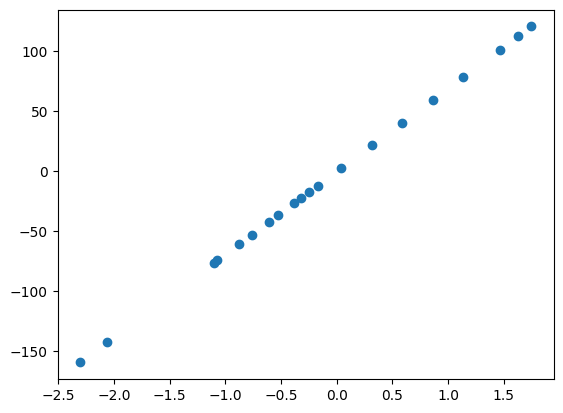

In [142]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [143]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    def fit(self, X, Y):  
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [144]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 2937.6446095153406


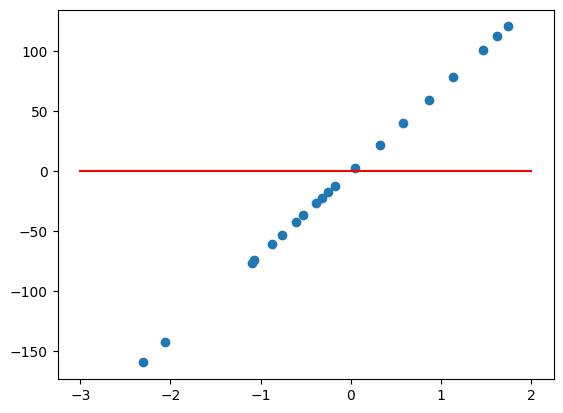

In [145]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [146]:
hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2253.7456808918546


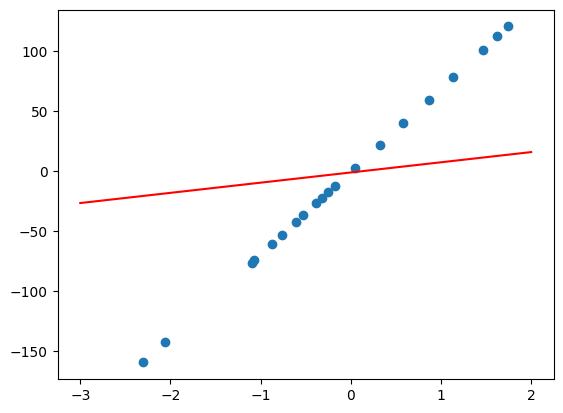

In [147]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [148]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [149]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.776975306057215e-06


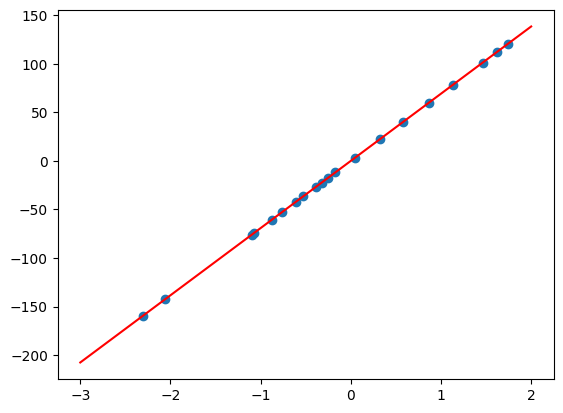

In [150]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

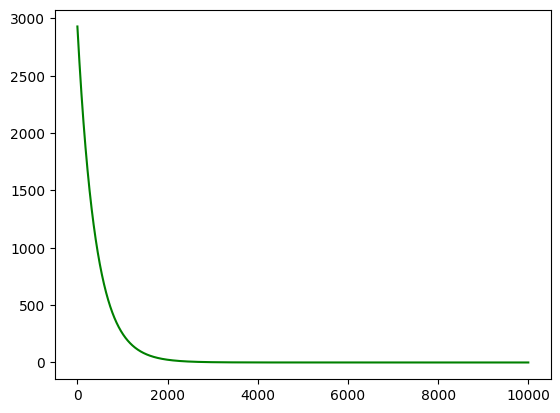

In [151]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

#### Задания для самостоятельного выполнения

1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму. 
1. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится. 
1. Модифицируйте код модели таким образом, чтобы он корректно работал как с _Series_, так и с _DataFrame_. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.
1. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например. 
1. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов. 
1. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр _alpha_ можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.
1. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.


In [152]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 100 # обновлено
        self.b1 = -10 # обновлено
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=1.55168, accuracy=0.01, max_steps=5000): # alpha обновлено > 1,55168 начинает расходиться
        steps, errors = [], []
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [153]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 6832.248963309845


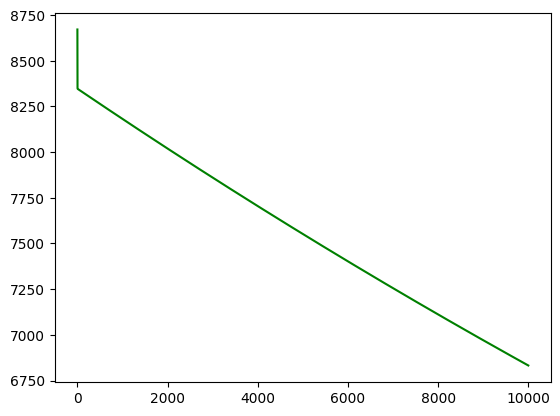

In [154]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

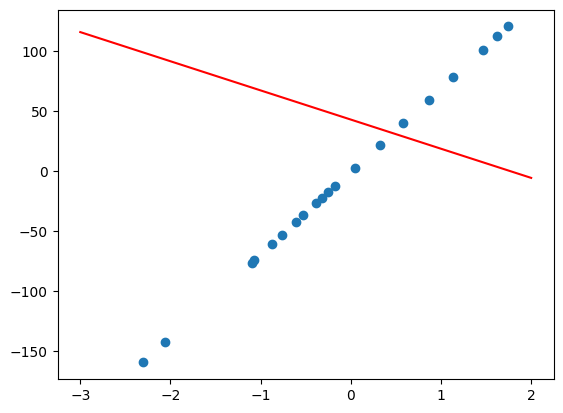

In [155]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [156]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 100  # обновлено
        self.b1 = -10  # обновлено

    def _prepare_input(self, X):
        """Приватный метод для подготовки данных X"""
        # Если X — это DataFrame, проверяем, что только 1 столбец, и берем его
        if isinstance(X, pd.DataFrame):
            if X.shape[1] != 1:
                raise ValueError("DataFrame должен содержать только один столбец!")
            X = X.iloc[:, 0]  # Извлекаем единственный столбец        
        return np.array(X)

    def predict(self, X):
        X = self._prepare_input(X) 
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        X = self._prepare_input(X)  # Преобразуем входные данные
        Y = self._prepare_input(Y)  # Преобразуем выходные данные
        return np.sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))

    def fit(self, X, Y, alpha=1.55169, accuracy=0.01, max_steps=5000):
        X = self._prepare_input(X)  # Преобразуем входные данные
        Y = self._prepare_input(Y)  # Преобразуем выходные данные
        
        steps, errors = [], []
        step = 0
        
        for _ in range(max_steps):
            dJ0 = np.sum(self.predict(X) - Y) / len(X)
            dJ1 = np.sum((self.predict(X) - Y) * X) / len(X)
            
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            
            # Рассчитываем новую ошибку
            new_err = self.error(X, Y)
            steps.append(step)
            errors.append(new_err)
            
            step += 1

            # Если ошибка стабилизируется или становится меньше указанной точности
            if len(errors) > 1 and abs(errors[-1] - errors[-2]) < accuracy:
                break
        
        return steps, errors


In [157]:
import numpy as np
import pandas as pd

class Model(object):
    """Модель парной линейной регрессии с адаптивной скоростью обучения"""
    def __init__(self):
        self.b0 = 100  # начальное значение b0
        self.b1 = -10  # начальное значение b1
    
    def _prepare_input(self, X):
        if isinstance(X, pd.DataFrame):
            if X.shape[1] != 1:
                raise ValueError("DataFrame должен содержать только один столбец!")
            X = X.iloc[:, 0]
        return np.array(X)

    def predict(self, X):
        X = self._prepare_input(X)
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        X = self._prepare_input(X)
        Y = self._prepare_input(Y)
        return np.sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))

    def fit(self, X, Y, alpha=1.0, accuracy=0.01, max_steps=5000, reduce_factor=2):
        X = self._prepare_input(X)
        Y = self._prepare_input(Y)

        steps, errors = [], []
        step = 0
        prev_error = float('inf') 
        best_b0, best_b1 = self.b0, self.b1

        for _ in range(max_steps):
            # Рассчитываем градиенты
            dJ0 = np.sum(self.predict(X) - Y) / len(X)
            dJ1 = np.sum((self.predict(X) - Y) * X) / len(X)
            
            # Обновляем параметры модели
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            
            # Рассчитываем новую ошибку
            new_err = self.error(X, Y)
            steps.append(step)
            errors.append(new_err)
            step += 1

            # Если ошибка увеличилась, уменьшаем скорость обучения и перезапускаем
            if new_err > prev_error:
                # Восстанавливаем лучшие параметры
                self.b0, self.b1 = best_b0, best_b1
                # Уменьшаем скорость обучения
                alpha /= reduce_factor
                print(f"Ошибка увеличилась. Уменьшаем alpha до {alpha}. Перезапуск.")
                # Перезапуск обучения с новыми параметрами
                step = 0
                steps = []
                errors = []
            else:
                # Если ошибка уменьшилась, обновляем предыдущую ошибку и сохраняем лучшие параметры
                prev_error = new_err
                best_b0, best_b1 = self.b0, self.b1

            # Если ошибка стабилизируется или становится меньше указанной точности
            if len(errors) > 1 and abs(errors[-1] - errors[-2]) < accuracy:
                print(f"Обучение завершено на шаге {step} с ошибкой {new_err}")
                break

        return steps, errors, alpha

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Model(object):
    """Модель парной линейной регрессии с адаптивной скоростью обучения и визуализацией"""
    def __init__(self):
        self.b0 = 0  # начальное значение b0
        self.b1 = 0  # начальное значение b1
    
    def _prepare_input(self, X):
        """Приватный метод для подготовки данных X (работает как с Series, так и с DataFrame)"""
        if isinstance(X, pd.DataFrame):
            if X.shape[1] != 1:
                raise ValueError("DataFrame должен содержать только один столбец!")
            X = X.iloc[:, 0]
        return np.array(X)

    def predict(self, X):
        """Предсказание на основе текущих коэффициентов"""
        X = self._prepare_input(X)
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        """Функция ошибки (MSE)"""
        X = self._prepare_input(X)
        Y = self._prepare_input(Y)
        return np.sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))

    def fit(self, X, Y, alpha=1.0, accuracy=0.01, max_steps=5000, reduce_factor=2):
        """Адаптивное обучение модели с уменьшением скорости обучения"""
        X = self._prepare_input(X)
        Y = self._prepare_input(Y)

        steps, errors = [], []
        step = 0
        prev_error = float('inf') 
        best_b0, best_b1 = self.b0, self.b1

        for _ in range(max_steps):
            # Рассчитываем градиенты
            dJ0 = np.sum(self.predict(X) - Y) / len(X)
            dJ1 = np.sum((self.predict(X) - Y) * X) / len(X)
            
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            
            # Рассчитываем новую ошибку
            new_err = self.error(X, Y)
            steps.append(step)
            errors.append(new_err)
            step += 1

            # Если ошибка увеличилась, уменьшаем скорость обучения и перезапускаем
            if new_err > prev_error:
                # Восстанавливаем лучшие параметры
                self.b0, self.b1 = best_b0, best_b1
                # Уменьшаем скорость обучения
                alpha /= reduce_factor
                print(f"Ошибка увеличилась. Уменьшаем alpha до {alpha}. Перезапуск.")
                # Перезапуск обучения с новыми параметрами
                step = 0
                steps = []
                errors = []
            else:
                # Если ошибка уменьшилась, обновляем предыдущую ошибку и сохраняем лучшие параметры
                prev_error = new_err
                best_b0, best_b1 = self.b0, self.b1

            # Если ошибка стабилизируется или становится меньше указанной точности
            if len(errors) > 1 and abs(errors[-1] - errors[-2]) < accuracy:
                print(f"Обучение завершено на шаге {step} с ошибкой {new_err}")
                break

        return steps, errors, alpha

    def plot(self, X, Y, steps, errors):
        """Метод для рисования графиков (ошибка и предсказания)"""
        X = self._prepare_input(X)
        Y = self._prepare_input(Y)
        
        # Нормализация данных (Min-Max нормализация)
        X_norm = (X - X.min()) / (X.max() - X.min())
        Y_norm = (Y - Y.min()) / (Y.max() - Y.min())
        predictions = self.predict(X)
        predictions_norm = (predictions - predictions.min()) / (predictions.max() - predictions.min())

        # Создаем два графика: график ошибки и график предсказаний
        fig, ax = plt.subplots(1, 2, figsize=(12, 5))
        
        # График ошибки (MSE по шагам)
        ax[0].plot(steps, errors, label='Ошибка (MSE)', color='blue')
        ax[0].set_title('Ошибка на каждом шаге обучения')
        ax[0].set_xlabel('Шаги')
        ax[0].set_ylabel('Ошибка (MSE)')
        ax[0].legend()

        # График предсказаний и реальных значений (нормализованных)
        ax[1].plot(X_norm, Y_norm, 'bo', label='Реальные значения')
        ax[1].plot(X_norm, predictions_norm, 'r-', label='Предсказанные значения')
        ax[1].set_title('Сравнение предсказаний и реальных значений')
        ax[1].set_xlabel('X (нормализованные данные)')
        ax[1].set_ylabel('Y (нормализованные данные)')
        ax[1].legend()

        plt.tight_layout()
        plt.show()


Ошибка увеличилась. Уменьшаем alpha до 0.5. Перезапуск.
Ошибка увеличилась. Уменьшаем alpha до 0.25. Перезапуск.
Ошибка увеличилась. Уменьшаем alpha до 0.125. Перезапуск.
Обучение завершено на шаге 13 с ошибкой 0.15512283631254953


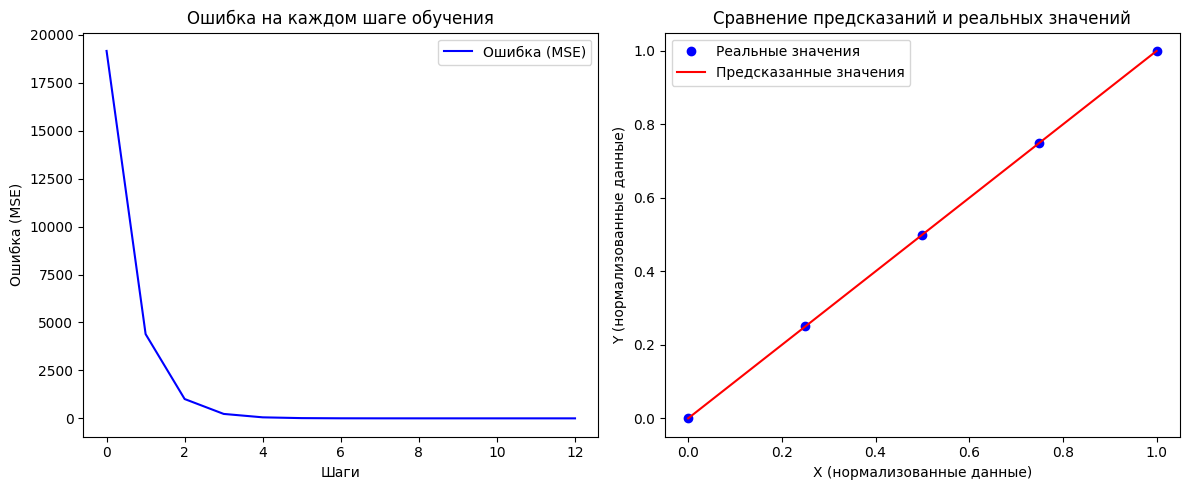

In [159]:
data = pd.DataFrame({
    'X': [1, 2, 3, 4, 5],
    'Y': [15, 25, 35, 45, 55]
})

model = Model()

steps, errors, final_alpha = model.fit(data[['X']], data['Y'], alpha=1.0, accuracy=0.01, max_steps=5000)

model.plot(data[['X']], data['Y'], steps, errors)


Обучение завершено на шаге 6 с ошибкой 0.0008603627290350642


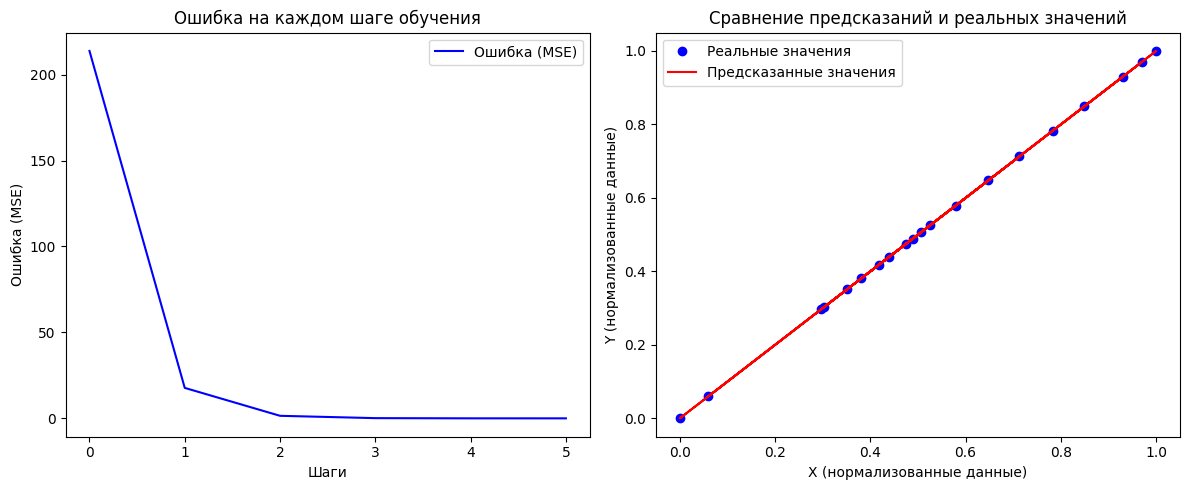

In [160]:
hyp = Model()
steps, errors, final_alpha = hyp.fit(x, y, alpha=1.0, accuracy=0.01, max_steps=5000)
model.plot(x, y, steps, errors)

In [161]:
hyp = Model()
steps, errors, alpha = hyp.fit(x, y, alpha=1.0, accuracy=0.01, max_steps=5000)
J = hyp.error(x, y)
print("error after gradient descent:", J)

Обучение завершено на шаге 6 с ошибкой 0.0008603627290350642
error after gradient descent: 0.0008603627290350642


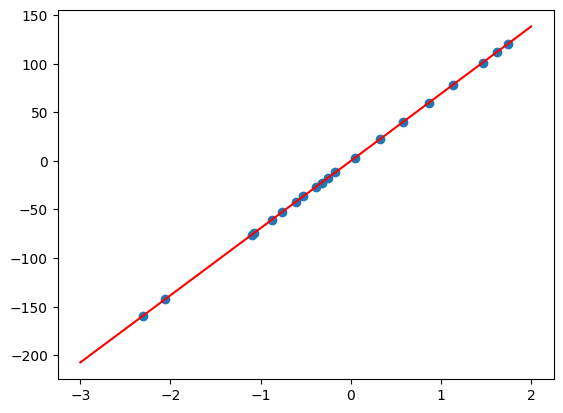

In [162]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()